### Read Excel File

In [1]:
import pandas as pd

df = pd.read_excel("Flood_Prediction_Dataset.xlsx", sheet_name = 0 )
df.head()

,Rainfall,RiverLevel,DrainageQuality,LandType,SoilSaturation,Elevation,NearbyWaterBody,Flood
0,143.6,3.57,Good,Urban,76.6,47.0,Yes,No
1,287.7,1.34,Poor,Urban,32.2,12.0,No,Yes
2,233.0,1.65,Moderate,Urban,66.1,62.0,Yes,No
3,199.7,4.59,Poor,Urban,68.5,80.0,Yes,Yes
4,89.0,3.43,Moderate,Urban,53.9,88.0,No,No


### Data Preprocessing and Cleaning

In [2]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall         200 non-null    float64
 1   RiverLevel       192 non-null    float64
 2   DrainageQuality  200 non-null    object 
 3   LandType         194 non-null    object 
 4   SoilSaturation   200 non-null    float64
 5   Elevation        194 non-null    float64
 6   NearbyWaterBody  200 non-null    object 
 7   Flood            200 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.6+ KB


Handle Missing Value

In [3]:
clean_df = df.copy()
mean_river = clean_df['RiverLevel'].mean()
mean_elevation = clean_df['Elevation'].mean()
mode_land = clean_df['LandType'].mode()[0]

clean_df['RiverLevel'] = clean_df['RiverLevel'].fillna(mean_river)
clean_df['Elevation'] = clean_df['Elevation'].fillna(mean_elevation)
clean_df['LandType'] = clean_df['LandType'].fillna(mode_land)

clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall         200 non-null    float64
 1   RiverLevel       200 non-null    float64
 2   DrainageQuality  200 non-null    object 
 3   LandType         200 non-null    object 
 4   SoilSaturation   200 non-null    float64
 5   Elevation        200 non-null    float64
 6   NearbyWaterBody  200 non-null    object 
 7   Flood            200 non-null    object 
dtypes: float64(4), object(4)
memory usage: 12.6+ KB


Change categorical data into numerical 

In [4]:
clean_df['DrainageQuality'].unique()

array(['Good', 'Poor', 'Moderate'], dtype=object)

In [5]:
clean_df['LandType'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
clean_df['NearbyWaterBody'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
clean_df['Flood'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
# For ordinal data
clean_df['Flood'] = clean_df['Flood'].map({'Yes':1 , 'No': 0})
clean_df['NearbyWaterBody'] = clean_df['NearbyWaterBody'].map({'Yes':1, 'No':0})
clean_df['DrainageQuality'] = clean_df['DrainageQuality'].map({'Good':2, 'Moderate':1, 'Poor':0})

# For nominal data
# Drop the first column 'rural' to prevent multicollinearity
clean_df = pd.get_dummies(clean_df, columns=['LandType'], drop_first = True, dtype=int) 



In [9]:
clean_df.info()
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rainfall           200 non-null    float64
 1   RiverLevel         200 non-null    float64
 2   DrainageQuality    200 non-null    int64  
 3   SoilSaturation     200 non-null    float64
 4   Elevation          200 non-null    float64
 5   NearbyWaterBody    200 non-null    int64  
 6   Flood              200 non-null    int64  
 7   LandType_Suburban  200 non-null    int64  
 8   LandType_Urban     200 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 14.2 KB


,Rainfall,RiverLevel,DrainageQuality,SoilSaturation,Elevation,NearbyWaterBody,Flood,LandType_Suburban,LandType_Urban
0,143.6,3.57,2,76.6,47.0,1,0,0,1
1,287.7,1.34,0,32.2,12.0,0,1,0,1
2,233.0,1.65,1,66.1,62.0,1,0,0,1
3,199.7,4.59,0,68.5,80.0,1,1,0,1
4,89.0,3.43,1,53.9,88.0,0,0,0,1


### Perform EDA

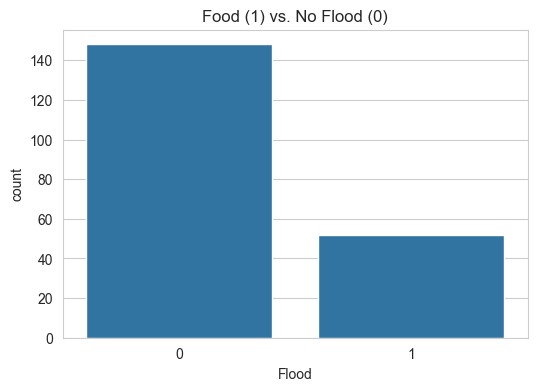

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(x='Flood', data=clean_df)
plt.title("Food (1) vs. No Flood (0)")
plt.show()

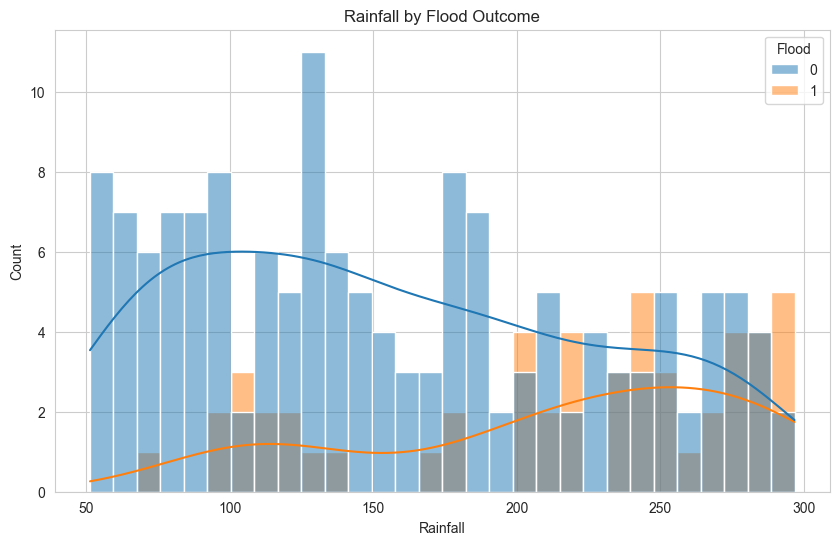

In [11]:
# The relationship between rainfall and flood
# hue - splits the category into 2 and overlap it when plotting
# kde - the line that tells the probability event occuring at the high peak

plt.figure(figsize=(10,6))
sns.histplot(data=clean_df, x = 'Rainfall', hue= 'Flood', kde = True, bins=30)
plt.title('Rainfall by Flood Outcome')
plt.show()

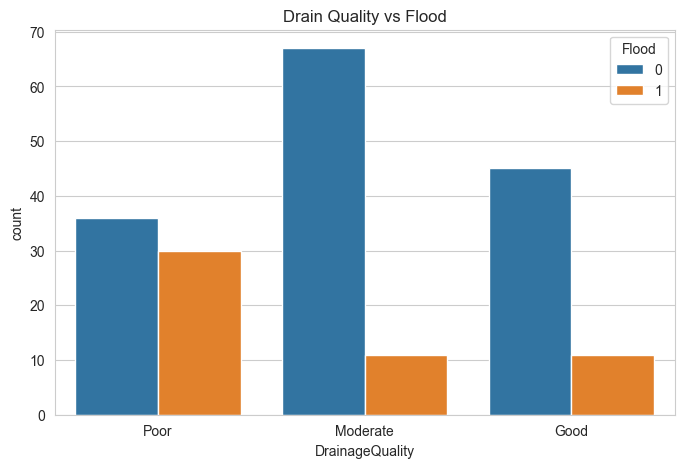

In [12]:
# Drainange Quality vs Flood
plt.figure(figsize=(8,5))
gph = sns.countplot(data=clean_df, x='DrainageQuality', hue='Flood')
plt.title('Drain Quality vs Flood')
plt.xticks([0,1,2],['Poor','Moderate','Good'])

plt.show()

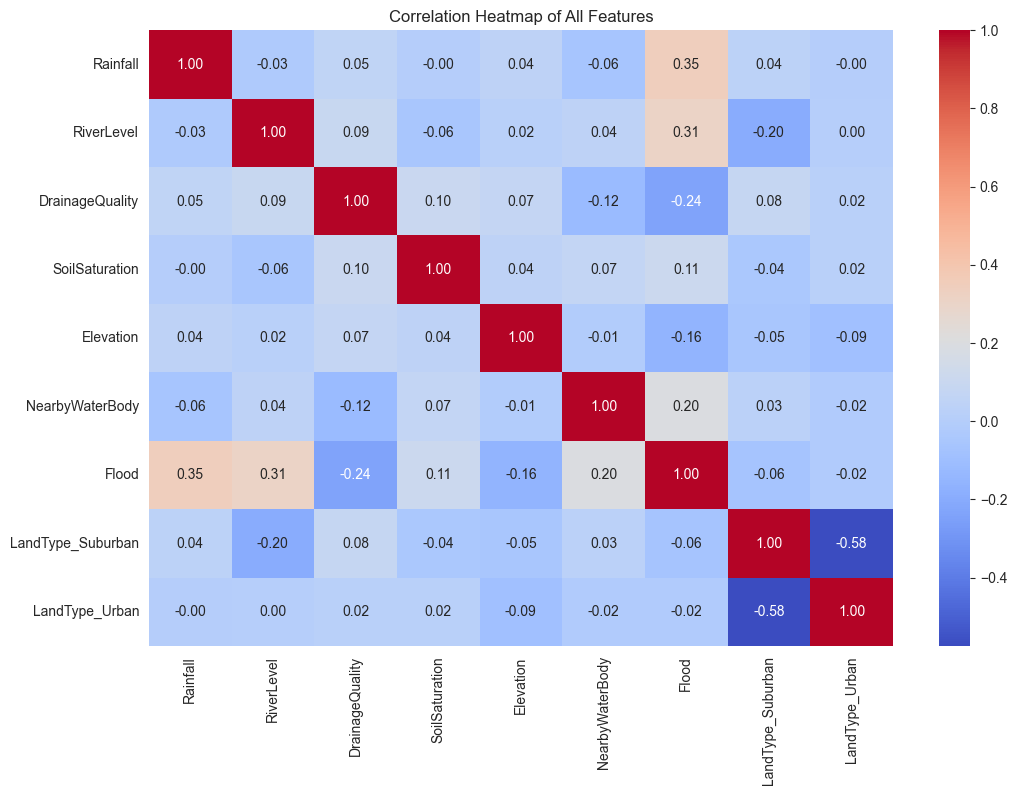

In [13]:
# Correlation of all feature
# annot - display the correlation value in the middle
# fmt - make the corr value to 2 decimal 
# cmap - the color
plt.figure(figsize=(12,8))
sns.heatmap(clean_df.corr(), annot= True, fmt='.2f', cmap= 'coolwarm')

plt.title('Correlation Heatmap of All Features')
plt.show()

### Model Preparation

In [14]:
from sklearn.model_selection import train_test_split

y = clean_df['Flood']
X = clean_df.drop('Flood', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42 )

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (140, 8)
Testing data shape: (60, 8)


In [15]:
# Standard Scalar - calculate mean and sd of each feature
# fit - looks at your data and calculates necessary statistic
# transform() - transform all the data by (X-mean)/sd
# reason use test mean and sd on test data - to keep the future value consistent
# because the model learn from the past

from sklearn.preprocessing import StandardScaler

numerical_feature = ['Rainfall', 'RiverLevel', 'SoilSaturation', 'Elevation']

scaler = StandardScaler()

X_train[numerical_feature] = scaler.fit_transform(X_train[numerical_feature])

X_test[numerical_feature] = scaler.transform(X_test[numerical_feature])

print("Scaled Training Data Head")
print(X_train.head())

Scaled Training Data Head
     Rainfall  RiverLevel  DrainageQuality  SoilSaturation  Elevation  \
169  0.355276   -1.391801                1       -0.020108   1.306925   
97  -0.198265   -0.901256                2        1.481315  -0.699066   
31  -1.070635    0.071376                0       -0.105010   1.237753   
12   1.174735    0.578837                0       -1.275763   0.684376   
35   1.093331    0.815651                0       -0.225660  -1.494546   

     NearbyWaterBody  LandType_Suburban  LandType_Urban  
169                0                  0               0  
97                 0                  1               0  
31                 0                  0               0  
12                 1                  1               0  
35                 0                  1               0  


Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

print("1. Decision Tree")
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
dt_model.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

1. Decision Tree
Accuracy: 0.7833

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        46
           1       0.52      0.86      0.65        14

    accuracy                           0.78        60
   macro avg       0.73      0.81      0.75        60
weighted avg       0.85      0.78      0.80        60



Neural Network Model

In [17]:
from sklearn.neural_network import MLPClassifier
print("2. Neural Network (MLP Classifier)")

nn_model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nn))

2. Neural Network (MLP Classifier)
Accuracy: 0.8333

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.64      0.64      0.64        14

    accuracy                           0.83        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.83      0.83      0.83        60



c:\Users\User\Documents\Data Mining Project\Flood-Prediction-Project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

print("Logistic Regression")

lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.7667

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.50      0.79      0.61        14

    accuracy                           0.77        60
   macro avg       0.71      0.77      0.72        60
weighted avg       0.82      0.77      0.78        60



Final Result

In [23]:
results_df = pd.DataFrame({
    'Model': ['Neural Network', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [0.8333, 0.7833, 0.7667], 
    'F1-Score (Flood)': [0.64, 0.65, 0.61] 
})

print("Model Comparison")
display(results_df.sort_values(by='F1-Score (Flood)', ascending=False))

Model Comparison


,Model,Accuracy,F1-Score (Flood)
1,Decision Tree,0.7833,0.65
0,Neural Network,0.8333,0.64
2,Logistic Regression,0.7667,0.61
